# The Effect of News Media and White House Sentiment on the Stock Market

#### Group 22 Julia Hoffman, Nikhil Pereira, Ryan Weiss
hjulia99@vt.edu, nikhil24@vt.edu, ryanw99@vt.edu

# Qualititative Section Step 1

#### -Questions, problem, hypothesis, claim, context, motivation
#### -Definitions, data, methods to be used
#### -Rationale, assumptions, biases

# Step 1. Define the Problem

### Problem Statement

The pandemic has caused great amount of stress on the US Economy. People have lost jobs, closed businesses and sacrificed greatly to survive. Tension over the news, politics and direction of the country is increasing. The gatekeepers of information should be selective in what they say to the public, because their words can have a significant impact on the economy and peoples lives. Fluctuations in the stock market are common after certain articles and tweets reach Wall Street and the general public. While key information is sometimes the cause of these changes in the market, it's often the sentiment that has the most profound impact, and this can be carefully crafted through specific language. With social media, including Twitter, having grown tremendously over the past decade, the effect of tweets on the direction of the market has simultaenously grown, and now is a crucial time to study these effects.

Additionally, with the COVID-19 situation being so new, there is not much research on how different sentiment has affected the stock market during this pandemic. Looking at those tweets have the largest effect on
indexes like the DOW Jones Index and the S&P 500 is important in determining economic influence. This involves not only individuals like the president, but news organizations like Fox News, CNN, and MSCNB. Further, an analysis of these tweets and headlines can help influential people and organizations determine what language tends to have positive or negative effects on the market, providing useful guidance for future crises.

### Problem Description

This project will analyze the relationship between how the White House and the media portray COVID-19 updates and the stock market. Because these sources are the gatekeepers of information to the American people, they have a significant impact on the economy. Currently, Twitter is the #1 news app on the app store, suggesting that this cite is where many citizens obtain their information. Tweets will be gathered and analyzed from Donald Trump, CNN, FoxNews, and MSNBC for sentiment. In addition, data from the DOW Jones Index and the S&P 500 will be used to track the stock market. This is a significant project because if successful, it can inform the American public about how negative or positive headlines could be directly effecting their livelihood. It will also suggest to gatekeepers to think twice about their sentiment before publishing a Tweet.

### Driving Research Questions

#### What is the effect of the White House and media sentiment on the stock market? 
#### Which gatekeeper has the larger effect on the stock market (S&P 500 and DOW Jones)? 
#### How should the American public and investors respond to news from each of the gatekeepers in the future?
#### Is one gatekeeper causing more damage to the US Economy than others?

# Quantitative Section Steps 2-5

#### Data processing, analysis, visualization
#### Documented code and results
#### Summary visuals

# Step 2. Collecting Data

### Data Gathering and Processing

Detailed Description of Data

Data is collected from yahoo finance and Twitter to later be analyzed for a relationship between news media/White House sentiment and the stock market. The python module yfinance is used to obtain the opening and closing price of the DOW Jones Index and the S&P 500 Index. We plan to focus our analysis on 10 days prior to the crash and 10 days post crash in March 2020.The DOW and S&P charts show evidence that there was a steep crash in March 2020. As for the Twitter data, tweepy is used to access tweets from Trump, CNN, Fox News, and MSNBC. Six csvs are going to be generated, two for financial data and four for each Twitter user.

In [53]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install yahoofinancials

Note: you may need to restart the kernel to use updated packages.


### Annotated Code for Financial Data

In [55]:
# Annotated Code for Financial Data

from pandas_datareader import data
# Getting Dow Jones and S&P 500 data
dow = data.DataReader('DJIA', start = '2019-11-17', end='2020-05-05', data_source='yahoo')
sp = data.DataReader('^GSPC', start = '2019-11-17', end='2020-05-05', data_source='yahoo')
dow['Date']=dow.index
sp['Date']=sp.index

### Set our Auth Keys for Tweepy API

In [56]:
# Importing API to access Twitter data 
import pandas as pd
import tweepy
import json
import pandas

# Function to read the key file and load keys in a dictionary
def loadKeys(key_file):
    with open('keys.json') as f:
        key_dict = json.load(f)
    return key_dict['api_key'], key_dict['api_secret'], key_dict['token'], key_dict['token_secret']

# Authenticate using oAuthHandler
KEY_FILE = 'keys2.json'
api_key, api_secret, token, token_secret = loadKeys(KEY_FILE)
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth)

### Function to Get User Data from All Twitter Users

In [5]:
from collections import defaultdict #Import a dictionary data structure to parse the twitter object Record Set

def get_user_data(username, numiterations,countTweet): #Function takes in the user number of tweets to 
    dataframe = pandas.DataFrame() #Create an empty dataframe
    user_tweets = api.user_timeline(username, count = countTweet, exclude_replies = True, include_rts = False) #Call the Twttier API
    user_dict = defaultdict(list) #Create an empty dictionary
    lastTweet = user_tweets[-1] #Retrieve the last ID in the Record Set
    newID = lastTweet.id #Store the last tweets ID
    for i in range(numiterations): #Iterate n times to gather previous timeline data of user
        tweets = api.user_timeline(username, count = countTweet, max_id=newID, exclude_replies = True, include_rts = False) #Call API with the last ID from previous timeline
        for tweet in tweets: #Store the data from the API in a dictionary
            user_dict["Date"].append(tweet.created_at)
            user_dict["text"].append(tweet.text)
            user_dict["ID"].append(tweet.id)
            user_dict["Username"].append(username)
        userdf = pd.DataFrame(user_dict) #Convert the dictionary to a dataframe
        frame = pandas.concat([dataframe,userdf]) #Make a frame that concats the first set of data to the current frame userdf
        newID = str(userdf.iloc[-1, :]['ID']) #Update the newID variable
    return frame #return the frame


### Call the Function with the Twitter User News Platform

In [6]:
FoxFrame = get_user_data('FoxNews',2,140).drop_duplicates() #Retreiving FoxNews Data
pandas.set_option('display.max_rows', None)
FoxFrame

Date                                               text  \
0   2020-04-20 18:37:05                            https://t.co/eyoNYGygyv   
1   2020-04-20 11:07:13                            https://t.co/6b3uAy8f8m   
2   2020-04-20 01:52:55                            https://t.co/5nZYckOFRE   
3   2020-04-20 00:41:49                            https://t.co/H3E9uM88MY   
4   2020-04-19 23:37:10                            https://t.co/Sp01aJJcSX   
5   2020-04-19 22:07:27                            https://t.co/OQXqSaEdc5   
6   2020-04-19 21:02:26                            https://t.co/ztTuqclHe7   
7   2020-04-19 19:51:20                            https://t.co/babbj2B8sR   
8   2020-04-19 18:33:40                            https://t.co/KBcY1YT95I   
9   2020-04-19 15:15:23                            https://t.co/A5OqYMSAIY   
10  2020-04-19 11:36:36                            https://t.co/ggikcxlQum   
11  2020-04-19 01:05:58                            https://t.co/T0nLJnndSO   
12  2020-04-18 21:07:07                            https://t.co/DdFHYfFlIY   
13  2020-04-18 20:01:56                            https://t.co/VZaoqxctRJ   
14  2020-04-18 18:49:44                            https://t.co/nMMIQ7IBEB   
15  2020-04-18 14:34:32                            https://t.co/js07Q3t47A   
16  2020-04-18 14:33:11                            https://t.co/kluPFRZt1E   
17  2020-04-18 02:24:11                            https://t.co/Zu8ra9Gsn7   
18  2020-04-18 01:34:01                            https://t.co/HJGBAotPMz   
19  2020-04-18 00:17:53                            https://t.co/LdalD3jKbV   
20  2020-04-17 23:11:13                            https://t.co/ka2cuMMnH8   
21  2020-04-17 21:53:55                            https://t.co/F1J1QbxjkB   
22  2020-04-17 20:59:07                            https://t.co/FkDxmu2yK0   
23  2020-04-17 20:32:19                            https://t.co/MB4GKQjHrt   
24  2020-04-17 19:06:41                            https://t.co/wVdR52wGKh   
25  2020-04-17 18:12:57                            https://t.co/bKQNPtnun2   
26  2020-04-17 13:13:22                            https://t.co/5u4aviivIq   
27  2020-04-17 10:10:06                            https://t.co/9wtLOsterl   
28  2020-04-17 02:25:58                            https://t.co/hVnvmd4M0a   
29  2020-04-17 01:48:29                            https://t.co/q4khWRHhza   
30  2020-04-17 00:34:58                            https://t.co/40DfCir5nb   
31  2020-04-16 23:24:50                            https://t.co/rCNoSoWCoD   
32  2020-04-16 21:54:41                            https://t.co/t3XN9wYYcw   
33  2020-04-16 20:24:17                            https://t.co/it0s2g2qCa   
34  2020-04-16 17:30:07                            https://t.co/JWLMXPghLK   
35  2020-04-16 15:37:44                            https://t.co/NBEqoOi3hT   
36  2020-04-16 15:23:02                            https://t.co/gENmwai9zD   
37  2020-04-16 15:21:33                            https://t.co/MHsz2oGL5K   
38  2020-04-16 02:03:36                            https://t.co/8rGZYpnOJe   
39  2020-04-16 01:18:29                            https://t.co/cwiZqHq8MC   
40  2020-04-16 00:26:27                            https://t.co/BusJkFK0lB   
41  2020-04-15 23:44:47                            https://t.co/w5tZEFn3bL   
42  2020-04-15 21:38:45                            https://t.co/8vf8w9nKBw   
43  2020-04-15 20:05:33                            https://t.co/qEVCrNTh20   
44  2020-04-15 18:33:32                            https://t.co/iFY6mQKNKB   
45  2020-04-15 17:50:24                            https://t.co/jPGY3NgHfv   
46  2020-04-15 17:37:28                            https://t.co/nT5QAKQoxu   
47  2020-04-15 17:36:24                            https://t.co/kMx79ReHzA   
48  2020-04-15 17:09:32                            https://t.co/mohOiLpsnR   
49  2020-04-15 02:13:29                            https://t.co/RBTzCbZMfV   
50  2020-04-15 01:08:26                  

In [7]:
CNNFrame = get_user_data('CNN',30,200).drop_duplicates() #Retreiving CNN News Data
CNNFrame

Date                                               text  \
0    2020-05-07 21:21:49  A new study finds no evidence the drug hydroxy...   
1    2020-05-07 21:10:42  The coronavirus pandemic is having an adverse ...   
2    2020-05-07 20:55:39  More than 75,000 people in the US have died fr...   
3    2020-05-07 20:54:07  The Senate failed to override a presidential v...   
4    2020-05-07 20:53:42  Brian Howe, former frontman for the British ro...   
5    2020-05-07 20:40:01  Google's parent company is abandoning a contro...   
6    2020-05-07 20:30:09  Scientists noticed two different colors of mat...   
7    2020-05-07 20:20:03  The Trump administration has asked the Supreme...   
8    2020-05-07 20:10:07  Street artist Banksy has unveiled a new piece ...   
9    2020-05-07 20:10:00  San Twin's mother is an employee at a meat-pac...   
10   2020-05-07 20:09:05  The Justice Department is dropping the crimina...   
11   2020-05-07 20:07:39  New York Gov. Andrew Cuomo announced extra pro...   
12   2020-05-07 20:07:10  New York Gov. Andrew Cuomo extended a ban on e...   
13   2020-05-07 20:05:48  The total of deaths in nursing homes and adult...   
14   2020-05-07 20:00:15  Former Vice President Al Gore, director Spike ...   
15   2020-05-07 19:48:02  A Texas salon owner who was sent to jail for s...   
16   2020-05-07 19:31:30  NASA astronauts Robert Behnken and Douglas Hur...   
17   2020-05-07 19:15:18  A leading epidemiologist who advised the UK go...   
18   2020-05-07 19:00:10  The Trump administration will not implement th...   
19   2020-05-07 18:55:08  JUST IN: The Justice Department is dropping th...   
20   2020-05-07 18:50:07  A member of the US Navy who serves as one of P...   
21   2020-05-07 18:40:05  Former President Barack Obama and former first...   
22   2020-05-07 18:30:06  Masks of any kind are not perfect barriers for...   
23   2020-05-07 18:20:03  Marc Rebillet has announced a concert tour tha...   
24   2020-05-07 18:10:04  Supporters will gather virtually Friday to mou...   
25   2020-05-07 18:04:47  A large portion of the country is expected to ...   
26   2020-05-07 17:56:30  The need to wear facemasks in public during th...   
27   2020-05-07 17:40:39  It’s not like this with other shows, especiall...   
28   2020-05-07 17:30:06  The bus driver says she hasn't had a good nigh...   
29   2020-05-07 17:16:11  Fighting the pandemic on the frontlines is als...   
30   2020-05-07 17:10:04  French people are being encouraged to eat more...   
31   2020-05-07 17:00:13  Former Vice President Al Gore, director Spike ...   
32   2020-05-07 16:50:05  Though a prosecutor says he'll let a grand jur...   
33   2020-05-07 16:40:07  A man in Nigeria was sentenced to death via th...   
34   2020-05-07 16:30:05  Costco says sales fell in April because of sta...   
35   2020-05-07 16:20:05  During this upheaval, some companies been thri...   
36   2020-05-07 16:10:00  Mei Kawajiri paints the nails of celebrities l...   
37   2020-05-07 16:00:06  Frontier Airlines has abandoned plans to charg...   
38   2020-05-07 15:50:05  No one expected airlines to report good news f...   
39   2020-05-07 15:40:06  Two fires are tearing through Santa Rosa and W...   
40   2020-05-07 15:34:19  The coronavirus has disrupted all matters of l...   
41   2020-05-07 15:27:50  This National Day of Prayer comes amid an ongo...   
42   2020-05-07 15:15:03  The contrast with results in other countries s...   
43   2020-05-07 15:02:33  Neiman Marcus has filed for bankruptcy as the ...   
44   2020-05-07 14:56:04  JUST IN: A member of the US Navy who serves as...   
45   2020-05-07 14:51:27  Coronavirus could cause up to a billion infect...   
46   2020-05-07 14:40:06  The Supreme Court unanimously throws out fraud...   
47   2020-05-07 14:30:29  Guns N' Roses frontman Axl Rose didn't hold ba...   
48   2020-05-07 14:20:09  The band Portugal. The Man is sending copies o...   
49   2020-05-07 14:10:06  Street artist Banksy has unveiled a new piec

In [8]:
MSNBCFrame = get_user_data('MSNBC',80,100).drop_duplicates() #Retreiving MSNBC Data
MSNBCFrame

Date                                               text  \
0    2020-05-08 04:43:01  Sen. Harris: “The president has his attorney g...   
1    2020-05-08 04:32:05  .@MaddowBlog: Trump: 'We make ourselves look b...   
2    2020-05-08 04:13:03  .@ChuckTodd: “The White House confirmed it has...   
3    2020-05-08 04:03:08  Fmr. Acting CDC Director Richard Besser: “In e...   
4    2020-05-08 03:47:01  1.6M people in Florida have filed for unemploy...   
5    2020-05-08 03:27:07  .@oneunderscore__ says “there’s no real way to...   
6    2020-05-08 03:14:02  .@DashaBurns reports from Washington state whe...   
7    2020-05-08 03:03:05  “It is breathtaking dishonesty from the Justic...   
8    2020-05-08 02:46:15  In Ep.13 of #IntoAmerica: America's unemployme...   
9    2020-05-08 02:32:03  .@Chrislhayes: “We have seen the president and...   
10   2020-05-08 02:18:05  UPDATE: At least 85 kids across U.S. have deve...   
11   2020-05-08 02:04:04  Dr. Scott Gottlieb says it's "highly likely" t...   
12   2020-05-08 01:42:03  The White House sent back the CDC’s recommenda...   
13   2020-05-08 01:32:01  A Detroit mother died holding her daughter’s h...   
14   2020-05-08 01:14:06  “Around the world you are seeing unprecedented...   
15   2020-05-08 01:10:05  House Intel Cmte. Chairman Schiff on the DOJ d...   
16   2020-05-08 01:09:05  WATCH: @SteveKornacki goes to the big board to...   
17   2020-05-08 00:46:02  Joe Biden is leading against President Trump b...   
18   2020-05-08 00:37:20  BREAKING: Father and son arrested and charged ...   
19   2020-05-08 00:34:04  Rep. Escobar on reopening the economy in Texas...   
20   2020-05-08 00:28:16  Live now on @MSNBC:\n\nHouse Intelligence Cmte...   
21   2020-05-08 00:14:04  Chicago Mayor on surge of COVID-19 cases in bl...   
22   2020-05-07 23:42:02  Sen. Harris: “The president has his attorney g...   
23   2020-05-07 23:29:03  "I think that he understands that there are so...   
24   2020-05-07 23:18:38  NEW: Dallas salon owner, who had defied her st...   
25   2020-05-07 23:17:09  In Ep.13 of #IntoAmerica: America's unemployme...   
26   2020-05-07 23:04:05  “Our support of equality for women and girls i...   
27   2020-05-07 22:41:03  Tara Reade, who accused Joe Biden of sexually ...   
28   2020-05-07 22:32:04  "This is dystopic," @Maddow says about the Tru...   
29   2020-05-07 22:17:04  Joe Biden says the killing of Ahmaud Arbery am...   
30   2020-05-07 22:01:04  S. Lee Merritt, attorney for the family of Ahm...   
31   2020-05-07 21:44:06  WATCH: @PeteWilliamsNBC breaks down Michael Fl...   
32   2020-05-07 21:32:02  .@MaddowBlog: Nurse exposes Pres. Trump to key...   
33   2020-05-07 21:16:04  .@JonLemire discusses the Justice Department d...   
34   2020-05-07 21:01:09  .@chrislhayes: "They try to prevent [President...   
35   2020-05-07 20:29:04  Rep. Shalala says that the House can subpoena ...   
36   2020-05-07 20:22:07  .@Maddow discusses how Iowa Gov. Reynolds says...   
37   2020-05-07 20:01:04  “He says he’s a wartime president, but he is s...   
38   2020-05-07 19:44:03  DEVELOPING: Potentially historic May snowstorm...   
39   2020-05-07 19:32:05  S. Lee Merritt, attorney for family of Ahmaud ...   
40   2020-05-07 19:31:46  "It's not good for the rule of law, it's not g...   
41   2020-05-07 19:20:57  .@PeteWilliamsNBC on Bridgegate case: "The pro...   
42   2020-05-07 19:13:04  The White House sent back the CDC’s recommenda...   
43   2020-05-07 19:07:09  BREAKING: Justice Dept. drops criminal case ag...   
44   2020-05-07 19:01:06  .@SteveSchmidtSES says President Trump's negat...   
45   2020-05-07 18:54:53  NEW: White House considering another possible ...   
46   2020-05-07 18:44:05  Sen. Coons discusses legislation that would re...   
47   2020-05-07 18:36:06  "This is dystopic," @Maddow says about the Tru...   
48   2020-05-07 18:31:05  Attorneys have released a video that apparentl...   
49   2020-05-07 18:21:49  Nicholas Confessore discusses NYTimes report

In [9]:
TrumpFrame = get_user_data('realDonaldTrump',10,1000).drop_duplicates() #Retreiving Trump Data
TrumpFrame

Date                                               text  \
0   2020-05-08 17:02:39                            https://t.co/HmWa7WXZQr   
1   2020-05-08 16:58:26  Retired Ice Director Tom Homan knows more abou...   
2   2020-05-08 11:29:39                                   DRAIN THE SWAMP!   
3   2020-05-08 11:18:13  Yesterday was a BIG day for Justice in the USA...   
4   2020-05-08 11:11:43  I will be interviewed on @foxandfriends at 8:0...   
5   2020-05-07 23:56:08    https://t.co/gQf2WFmQiC https://t.co/6ZqJ8AAlRc   
6   2020-05-07 19:30:21                            https://t.co/914FsNsbu7   
7   2020-05-07 18:36:34  Today, @FLOTUS celebrates the two year anniver...   
8   2020-05-07 17:27:25  Congratulations to former Governor of New Jers...   
9   2020-05-07 16:25:56  As you know, I designated this day to be a Nat...   
10  2020-05-06 20:41:23                            https://t.co/lZYGaD72Og   
11  2020-05-06 15:16:53        The Fake News has reached an all time high!   
12  2020-05-06 13:05:58  The White House CoronaVirus Task Force, headed...   
13  2020-05-06 03:22:09      Thank you @Honeywell! https://t.co/4jH6NF63XI   
14  2020-05-06 00:02:17                            https://t.co/cnQ4tL0aN3   
15  2020-05-05 22:06:11  I was thrilled to be back in the Great State o...   
16  2020-05-05 20:25:31  Will be doing a major interview tonight at 6:3...   
17  2020-05-05 19:25:14  On #NationalTeacherDay, we recognize the count...   
18  2020-05-05 18:51:34  Getting ready to land in the Great State of Ar...   
19  2020-05-05 18:50:20  Wow! Congratulations to Greg Gutfeld, a one ti...   
20  2020-05-05 18:37:54  Well run States should not be bailing out poor...   
21  2020-05-05 18:18:26  Most of the money raised by the RINO losers of...   
22  2020-05-05 17:35:53  Remember this? Happy #CincoDeMayo! https://t.c...   
23  2020-05-05 16:55:29  The Do Nothing Democrats and their leader, the...   
24  2020-05-05 16:52:10  For the constant criticism from the Do Nothing...   
25  2020-05-05 13:13:29  Governors should let roads and highway constru...   
26  2020-05-05 12:39:33                                Heading to Arizona!   
27  2020-05-05 12:36:07  Oil prices moving up nicely as demand begins a...   
28  2020-05-05 12:33:32  Exciting to see our Country starting to open u...   
29  2020-05-05 04:46:31  A group of RINO Republicans who failed badly 1...   
30  2020-05-05 02:45:35    THANK YOU #USNSComfort! https://t.co/Hp89n5xGIK   
31  2020-05-04 22:35:30  MSDNC and FAKE NEWS CNN are going wild trying ...   
32  2020-05-04 22:35:02  A great new book, “Fortitude: American Resilie...   
33  2020-05-04 14:24:08  Interesting? By Congress not wanting the speci...   
34  2020-05-04 13:42:13  Mexico is sadly experiencing very big CoronaVi...   
35  2020-05-04 13:36:33  Republicans love the biggest Tax Cuts, Rebuilt...   
36  2020-05-04 12:31:46  And I’m Endorsing you also Lacy, you truly des...   
37  2020-05-04 12:19:45  Getting great reviews, finally, for how well w...   
38  2020-05-04 10:38:11  “Concast” should open up a long overdue Florid...   
39  2020-05-04 02:42:50  I’m with the TRUCKERS all the way. Thanks for ...   
40  2020-05-04 02:06:38                            https://t.co/cnQ4tKIzVv   
41  2020-05-03 22:08:28                            https://t.co/O4iRRKJkyS   
42  2020-05-03 20:41:08  Thank you Ryan. Working hard! https://t.co/ZnY...   
43  2020-05-03 20:18:19  Intelligence has just reported to me that I wa...   
44  2020-05-03 18:10:00  Thank you very much to our beautiful “boaters....   
45  2020-05-03 14:43:31  ....And then came a Plague, a great and powerf...   
46  2020-05-03 14:36:19  So nice to see this great honor. Thank you (bu...   
47  2020-05-03 14:30:44  Going well despite the Fake News! https://t.co...   
48  2020-05-03 13:00:38  Some things never get old! https://t.co/0GHkJj...   
49  2020-05-03 12:57:40       Progress being made! https://t.co/cqHKwJCJNm   
50  2020-05-03 12:56:15                 T

### Summary of Data Collection Step 2

The Data Collection step was mostly successful. As a team we were able to get the Financial Data quickly and easily. For the Twitter data, we devised a useful method that would iterate through the user's timeline to retrieve as many posts as possible. The only drawback we had to the Twitter data was that many of the tweets containt URLs rather than actual text. The data will need to be cleaned in the next steps in order to continue the Data Process Pipeline

### Save All Frames to CSV

In [10]:
FoxFrame.to_csv('ProjectData/FoxData.csv')
CNNFrame.to_csv('ProjectData/CnnData.csv')
MSNBCFrame.to_csv('ProjectData/MSNBCData.csv')
TrumpFrame.to_csv('ProjectData/TrumpTwitterData.csv')

### Sample Sentiment Analysis on Trump Data to show project path

This is a sample 20 recent Tweets from Trump and we did a quick VADER sentiment analysis to show the direction of the project. This is a quick demonstration on how we will be doing Sentiment analysis on Twitter User Data before and after the stock market crash

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt
import numpy

#read the file into dataframe. "header=0" means the first row will be considered as a header
##****** Make a dictionary and determine the data types correctly
frame = pd.read_csv("ProjectData/TrumpTwitterData.csv", header=0, dtype={'date':str,"text":str,'id':str, 'Username':str})
analyzer = SentimentIntensityAnalyzer() #Store the sentiment variable
sentimentDict = defaultdict(list)
headframe = frame.head(20)
for sentence in headframe.text: #Compute the scores for each sentence in frame
    vs = analyzer.polarity_scores(sentence)
    sentimentDict["Negative Score"].append(vs['neg'])
    sentimentDict["Neutral Score"].append(vs['neu'])
    sentimentDict["Positive Score"].append(vs['pos'])
    sentimentDict["Compound Score"].append(vs['compound'])
frame2 = pd.DataFrame(sentimentDict)
userData = pd.concat([frame, frame2], axis=1, sort=False).drop(['Unnamed: 0','ID'],axis=1).iloc[0:20,:] #Concat the numeric and non-numeric data into one frame
score = userData.mean()
print(score)
userData

Negative Score    0.021600
Neutral Score     0.829950
Positive Score    0.148450
Compound Score    0.296475
dtype: float64


Date                                               text  \
0   2020-05-08 17:02:39                            https://t.co/HmWa7WXZQr   
1   2020-05-08 16:58:26  Retired Ice Director Tom Homan knows more abou...   
2   2020-05-08 11:29:39                                   DRAIN THE SWAMP!   
3   2020-05-08 11:18:13  Yesterday was a BIG day for Justice in the USA...   
4   2020-05-08 11:11:43  I will be interviewed on @foxandfriends at 8:0...   
5   2020-05-07 23:56:08    https://t.co/gQf2WFmQiC https://t.co/6ZqJ8AAlRc   
6   2020-05-07 19:30:21                            https://t.co/914FsNsbu7   
7   2020-05-07 18:36:34  Today, @FLOTUS celebrates the two year anniver...   
8   2020-05-07 17:27:25  Congratulations to former Governor of New Jers...   
9   2020-05-07 16:25:56  As you know, I designated this day to be a Nat...   
10  2020-05-06 20:41:23                            https://t.co/lZYGaD72Og   
11  2020-05-06 15:16:53        The Fake News has reached an all time high!   
12  2020-05-06 13:05:58  The White House CoronaVirus Task Force, headed...   
13  2020-05-06 03:22:09      Thank you @Honeywell! https://t.co/4jH6NF63XI   
14  2020-05-06 00:02:17                            https://t.co/cnQ4tL0aN3   
15  2020-05-05 22:06:11  I was thrilled to be back in the Great State o...   
16  2020-05-05 20:25:31  Will be doing a major interview tonight at 6:3...   
17  2020-05-05 19:25:14  On #NationalTeacherDay, we recognize the count...   
18  2020-05-05 18:51:34  Getting ready to land in the Great State of Ar...   
19  2020-05-05 18:50:20  Wow! Congratulations to Greg Gutfeld, a one ti...   

           Username  Negative Score  Neutral Score  Positive Score  \
0   realDonaldTrump           0.000          1.000           0.000   
1   realDonaldTrump           0.054          0.871           0.074   
2   realDonaldTrump           0.000          1.000           0.000   
3   realDonaldTrump           0.000          0.733           0.267   
4   realDonaldTrump           0.000          0.720           0.280   
5   realDonaldTrump           0.000          1.000           0.000   
6   realDonaldTrump           0.000          1.000           0.000   
7   realDonaldTrump           0.000          0.705           0.295   
8   realDonaldTrump           0.000          0.822           0.178   
9   realDonaldTrump           0.000          0.934           0.066   
10  realDonaldTrump           0.000          1.000           0.000   
11  realDonaldTrump           0.288          0.594           0.119   
12  realDonaldTrump           0.000          0.847           0.153   
13  realDonaldTrump           0.000          0.518           0.482   
14  realDonaldTrump           0.000          1.000           0.000   
15  realDonaldTrump           0.000          0.741           0.259   
16  realDonaldTrump           0.000          1.000           0.000   
17  realDonaldTrump           0.000          1.000           0.000   
18  realDonaldTrump           0.000          0.537           0.463   
19  realDonaldTrump           0.090          0.577           0.333   

    Compound Score  
0           0.0000  
1           0.1154  
2           0.0000  
3           0.8074  
4           0.5411  
5           0.0000  
6           0.0000  
7           0.7717  
8           0.5994  
9           0.1779  
10          0.0000  
11         -0.4574  
12          0.5574  
13          0.4199  
14          0.0000  
15          0.7906  
16          0.0000  
17          0.0000  
18          0.7840  
19          0.8221

# Step 3. Process Data

In this step of the data process pipeline we need to clean the URL type tweets and find the text. To do this we will perform a webscraping method that using BeautifulSoup and requests. We will be creating functions to convert the URLs into text that way we can analyze the type of links the different Users are sharing. Another cleaning step that we have to do is to reformat the Date Time Columns so that they are easier to read when we graph the data frames

### Cleaning the URL Tweets from Phase 1: Gathering Twitter Data 

In [12]:
#Imports vader sentiment analyzer, pandas, beautiful soup, and numpy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

# Importing tweet csvs as dataframes
trumpTweets = pd.read_csv('ProjectData/TrumpTwitterData.csv').drop('Unnamed: 0', axis=1)
cnnTweets = pd.read_csv('ProjectData/CnnData.csv').drop('Unnamed: 0', axis=1)
foxTweets = pd.read_csv('ProjectData/FoxData.csv').drop('Unnamed: 0', axis=1)
msnbcTweets = pd.read_csv('ProjectData/MSNBCData.csv').drop('Unnamed: 0', axis=1)

In [13]:
# Creating function to pull title of page from url 
def get_title(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    return soup.title.text

In [14]:
# Creating function to map the correct title to each tweet 
def title_cleaner(text):
    if 'https' in text[:5]:
        return(get_title(str(text)))
    else:
        return text 

In [15]:
# Converting urls into headline titles
foxTweets.text = foxTweets.text.map(title_cleaner)
cnnTweets.text = cnnTweets.text.map(title_cleaner)
msnbcTweets.text = msnbcTweets.text.map(title_cleaner)
trumpTweets.text = trumpTweets.text.map(title_cleaner)

### Re-formatting the Date Time Stamp using Time Series Objects

In [16]:
#Creating function to map the reformatted date to the date columns
def timeCleaner(date):
    string1 = pandas.to_datetime(date)
    string1 = string1.strftime('%B-%d-%Y')
    return string1

In [17]:
#Mapping the Date Column to that function
foxTweets.Date = foxTweets.Date.map(timeCleaner)
cnnTweets.Date = cnnTweets.Date.map(timeCleaner)
msnbcTweets.Date = msnbcTweets.Date.map(timeCleaner)
trumpTweets.Date = trumpTweets.Date.map(timeCleaner)
dow.Date=dow.Date.map(timeCleaner)
sp.Date=sp.Date.map(timeCleaner)

### Summary of the Data Processing Step 3
In this step we were able to clean the data by converting URLs into actual text and the date time object into a readable format. This cleaning step was crucial before moving on the future steps to visualize and analyze the data. Overall this step was fairly simple and only required a few functions because the API we used were good at returning clean data to begin with

# Step 4. Visualize the Data

### Visualizing Financial Data of the DOW and SAP from the Past 4 Months

We plan to focus our analysis on the last few months post crash in March 2020.The DOW and S&P charts show evidence that there was a steep crash in March 2020. As for the Twitter data, tweepy is used to access tweets from Trump, CNN, Fox News, and MSNBC.

Text(0, 0.5, 'Price')

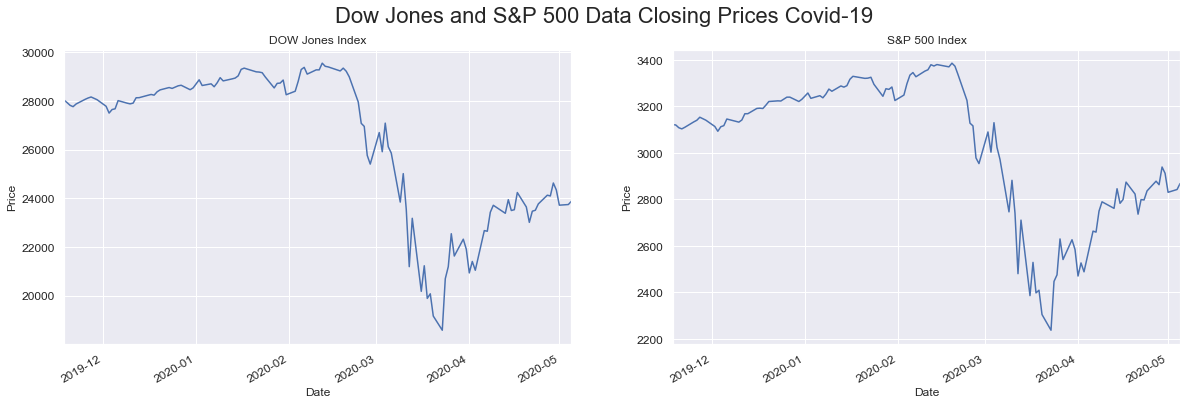

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# # Making graph header 
f, (dowplot, spplot) = plt.subplots(1, 2, figsize=(20, 6))
f.suptitle('Dow Jones and S&P 500 Data Closing Prices Covid-19', fontsize=22)

# Plotting the closing prices 
dow.Close.plot(title = 'DOW Jones Index', ax = dowplot, fontsize=12)
dowplot.set_ylabel('Price')
sp.Close.plot(title = 'S&P 500 Index', ax = spplot, fontsize=12)
spplot.set_ylabel('Price')

These two line plots show the trend of the DOW Jones and S&P 500 over the past 5 months or time that COVID-19 became apparent. As one can see these two indexes were at their peak for December 2019 - February 2020 before COVID 19 began to have an effect on the market. The volatility and panic hit the United States in late February and this corresponds to the time the government imposed the national lockdown and news outlets were covering the pandemic

### Visualizing Trump Data through sample Sentiment Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Positive Score')

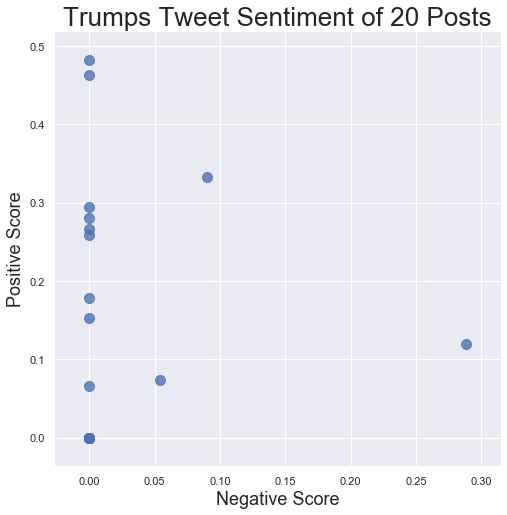

In [20]:
userData.Date = userData.Date.map(timeCleaner)
p = userData.plot.scatter(x='Negative Score', y='Positive Score',
                   s =100, #marker size to population but divide to make smaller and add constant
                   figsize=(8,8), #Make the figure size big enough
                   alpha=0.8, #between 0 (transparent) and 1 (opaque). 
                   sharex=False) # sharex = convinces xlabel to show
p.set_title('Trumps Tweet Sentiment of 20 Posts',fontsize=26) #Put a big title
p.set_xlabel("Negative Score", fontsize=18) #Put a x label
p.set_ylabel("Positive Score", fontsize=18) #Put a y label

### Trump's 20 Recent Post Sentiment

In this scatter plot we can see a quick visual on how Trump's last 20 posts have been more positive leaning than negative. This sort of preliminary conclusion shows that Trump has been optimistic amid the Pandemic (End of April) and that we can probably infer the same conclusion when looking at end of March data. This is a sample sentiment visual that can be done for all the Twitter users and to analyze how their Twitter behaviour has been fluctuating through the COVID Pandemic.

# Step 5. Analyze the Data

In this section we are going to use VADER sentiment analysis to examine the behaviour of the four Twitter users: MSNBC, CNN, FOX and realDonaldTrump. We want to understand their sentiment over the past few months so that we can determine which GateKeeper is having the greatest influence on the Stock Market. We are going to create a vader function to retrieve the scores and then combine all the data into one frame for analysis. Finally we will use a Bar Plot and Box Plot to visualize the summary statistics from the VADER sentiment analyzer.

### Analyzing Sentiment on Clean  Twitter Data

In [21]:
# The parameter is a csv file that's been read in using pandas, and has the tweet text in
# a column titled 'text'.
def vader_score_getter(data):

    # Creates empty lists for the VADER scores
    neg = []
    neu = []
    pos = []
    compound = []
    
    # Gets the VADER scores for each tweet and adds them to the respective lists.
    analyzer = SentimentIntensityAnalyzer()
    for line in data['text']:
        vs = analyzer.polarity_scores(line)
        neg.append(vs['neg'])
        neu.append(vs['neu'])
        pos.append(vs['pos'])
        compound.append(vs['compound'])
    
    # Adds the lists as columns to the dataframe
    data['VADER negative score'] = neg
    data['VADER neutral score'] = neu
    data['VADER positive score'] = pos
    data['VADER compound score'] = compound
    
    # Returns the new dataframe
    return data

### Call the Vader Score Getter for each Twitter User (Fox, CNN, MSNBC, Trump)

In [22]:
# Creating dataframe with positive, negative, and neutral sentiment of headline
foxData2 = vader_score_getter(foxTweets)
cnnData2 = vader_score_getter(cnnTweets)
msnbcData2 = vader_score_getter(msnbcTweets)
trumpData2 = vader_score_getter(trumpTweets)

### Combine all the sentiment and frames into one Data Frame for Plotting and Comparisons 

In [23]:
alldata = pd.concat([foxData2, cnnData2, msnbcData2, trumpData2]).reset_index().iloc[:, 1:]
alldata

Date                                               text  \
0     April-20-2020  'Walking miracle' 34-year-old coronavirus pati...   
1     April-20-2020  Bipartisan breakthrough? Pols unveil 'Back to ...   
2     April-20-2020  First responder opens up on emotional toll of ...   
3     April-20-2020  Fr. Frank Pavone says coronavirus crisis will ...   
4     April-19-2020  Trump announces coronavirus testing milestone,...   
5     April-19-2020  Massachusetts nurse prints family pictures for...   
6     April-19-2020  Thunderbirds honor coronavirus responders in C...   
7     April-19-2020  Schumer defends adding demands to small busine...   
8     April-19-2020  Peter Navarro: China 'cornered' the personal p...   
9     April-19-2020  Dr. David Katz: Coronavirus vaccine or herd im...   
10    April-19-2020  Nancy Pelosi says agreement on small business ...   
11    April-19-2020  NY, NJ, Connecticut announce reopening of mari...   
12    April-18-2020  Therapy dog Loki delivers care packages to hea...   
13    April-18-2020  Pence tells Air Force Academy graduates they i...   
14    April-18-2020  Medal of Honor recipient Bennie Adkins loses b...   
15    April-18-2020  Crowds flock to Jacksonville beaches; model si...   
16    April-18-2020  Top coronavirus model significantly lowers tot...   
17    April-18-2020  How the Class of 2020 will graduate during a p...   
18    April-18-2020  Country star Charlie Daniels on helping vetera...   
19    April-18-2020  Marines race down NYC pier carrying oxygen tan...   
20    April-17-2020  Coronavirus leads food industry to lend a help...   
21    April-17-2020  Astronaut Mike Massimino describes the isolati...   
22    April-17-2020  Georgia restaurateur sells car to pay her empl...   
23    April-17-2020  Tennessee Uber driver delivers meals from loca...   
24    April-17-2020  Coronavirus antibody testing finds Bay Area in...   
25    April-17-2020  US officials confirm full-scale investigation ...   
26    April-17-2020  Coronavirus pandemic and grocery shopping: No ...   
27    April-17-2020  NJ HOA denies request to allow physician assis...   
28    April-17-2020  Bret Baier: Lawmakers from both parties weighi...   
29    April-17-2020  USNS Comfort commander describes how Navy doct...   
30    April-17-2020  A look at the Wuhan laboratory at the center o...   
31    April-16-2020  Trump unveils coronavirus guidelines for rolli...   
32    April-16-2020  US, Canada have funded Chinese lab eyed as lik...   
33    April-16-2020  Lawmakers call for China to face accountabilit...   
34    April-16-2020  Mom discovers family photo in face mask video ...   
35    April-16-2020  California churches sue Newsom over coronaviru...   
36    April-16-2020  Coronavirus timeline shows politicians', media...   
37    April-16-2020  Small business loan program runs out of money,...   
38    April-16-2020  Pompeo rips China in response to Wuhan lab rep...   
39    April-16-2020  China may be conducting secret nuclear tests, ...   
40    April-16-2020  Sources believe coronavirus outbreak originate...   
41    April-15-2020  Trump argues US has ‘passed the peak on new ca...   
42    April-15-2020  California's Newsom announces $125M fund to gi...   
43    April-15-2020  World Health Organization leader asks US to re...   
44    April-15-2020  IRS launches 'Get My Payment' app to speed up ...   
45    April-15-2020  Drivers swarm Michigan capital to protest coro...   
46    April-15-2020  China's claim of zero coronavirus infections i...   
47    April-15-2020  Aviation experts say airlines would be better ...   
48    April-15-2020  California pastor cited for 'hiding' congregan...   
49    April-15-2020  Pence tells 'Ingraham Angle' Trump will move t...   
50    April-15-2020  The Big Show says WWE, deemed ‘essential,' has...   
51    April-15-2020  Florida Mayo Clinic using autonomous vehicles ...   
52    April-14-2020  Trump announces US will halt funding to World ...   
53    April-14-2020

###  Analyzing the Sentiment for the Twitter Users through Bar Chart and Box Plot
In this section of the data science experiment we are trying to visualize the VADER scores gathered in the alldata frame. By using the bar and box plots we can get visuals on how the sentiment of different Twitter users differ amid the Pandemic.

Text(0, 0.5, 'Sentiment Percentage of Tweet')

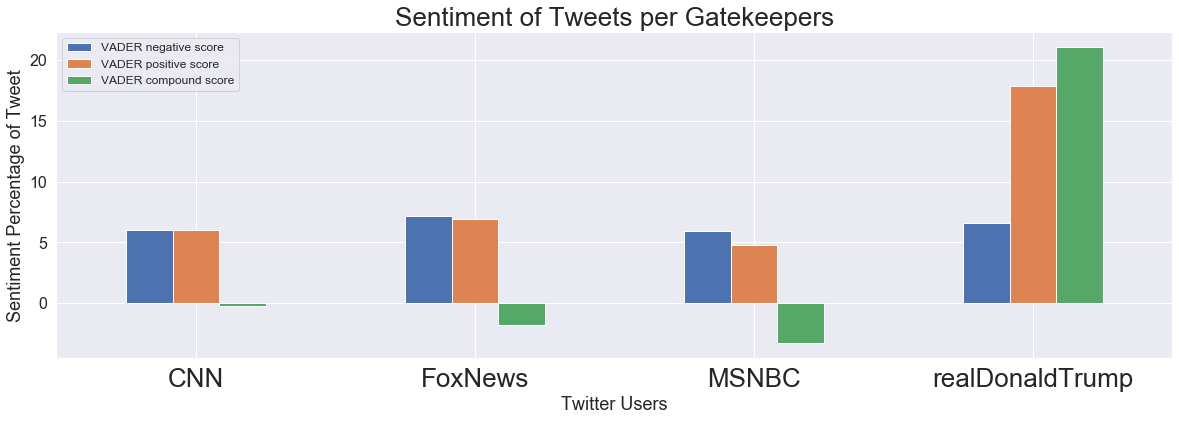

In [24]:
#Parallel plot to see the scores grouped by each subreddit
framePP = alldata.drop(['text','ID','Date','VADER neutral score'], axis=1).groupby('Username').mean()*100
plot = framePP.plot.bar(figsize=(20, 6))
plot.legend(loc=2, prop={'size': 12}) #Place a legend on the plot
for tick in plot.xaxis.get_major_ticks(): #Adjust the x axis labels by adjusting their size and orientation
                tick.label.set_fontsize(26) 
                tick.label.set_rotation('horizontal')
for tick in plot.yaxis.get_major_ticks(): #Adjust the y axis labels by adjusting their size
                tick.label.set_fontsize(16) 
plot.set_title('Sentiment of Tweets per Gatekeepers',fontsize=26) #Put a big title
plot.set_xlabel("Twitter Users", fontsize=18) #Put a x label
plot.set_ylabel("Sentiment Percentage of Tweet", fontsize=18) #Put a y label

Text(0, 0.5, 'Negative Sentiment Score')

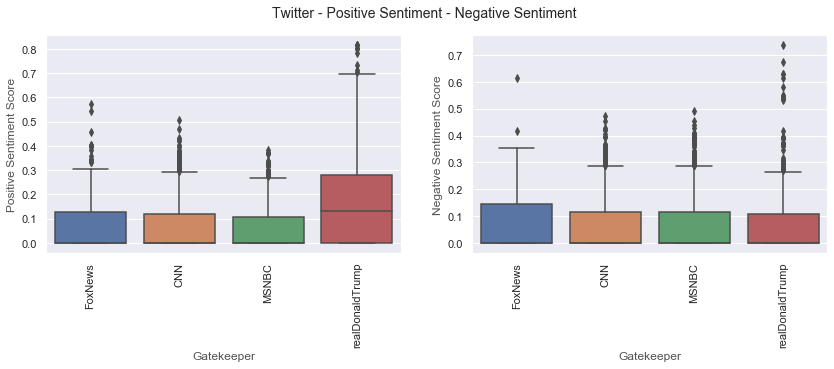

In [57]:
# Making box plot header 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Twitter - Positive Sentiment - Negative Sentiment', fontsize=14)

# Plotting positive sentiment scores per gatekeeper
seaborn.boxplot(x="Username", y="VADER positive score", data=alldata, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
ax1.set_xlabel("Gatekeeper",size = 12,alpha=0.8)
ax1.set_ylabel("Positive Sentiment Score",size = 12,alpha=0.8)

# Plotting negative sentiment scores per gatekeeper
seaborn.boxplot(x="Username", y="VADER negative score", data=alldata, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation='vertical')
ax2.set_xlabel("Gatekeeper",size = 12,alpha=0.8)
ax2.set_ylabel("Negative Sentiment Score",size = 12,alpha=0.8)


### Summary of Sentiment Graphs (Bar and Box Plots)
The bar plot above shows how the positive, negative and compound score compare for each Twitter User. From the graphs we can see that Donald Trump's Twitter has the most positive sentiment and compound score (single normalized score) whereas FoxNews has the most negative sentiment and compound score. We can also see that CNN and MSNBC are mostly neutral because their compound score hovers around 0. This graph give us a good insight on how these Twitter Users behaved over the last few months with the COVID-19 Pandemic. Note that VADER mostly categorized everyone's tweets as neutral but we are comparing just the postive and negative metrics to make better conclusions.

This box plot shows the variance of positive and negative sentiment between Tweets of each gatekeeper. Trump's tweets have the largest distribution of positive sentiment and the smallest distribution of negative sentiment with a few outliers. All three news outlets have relatively equal distributions for positive and negative sentiment suggesting that they are more neutral. Of the gatekeepers, FoxNews has the largest distribution of negative sentiment. 


### Timeline of Gatekeeper Sentiment through Stock Market Crash

In this section we are going to analyze the sentiment of each gatekeeper around a few months after the stock market crash by looking at how the sentiment of the gatekeepers change overtime and comparing the results to the trends in the stock indicies we can determine if there is any patterns.

### Find the Average Compound Score Per Day for Each Gatekeeper

In [ ]:
# Plotting sentiment over time to compare to stock market
# Averaging the VADER scores of tweets from the same day to get a single data point for said day
def average_data(dataframe):
    dates = []
    scores = []
    dictionary = {'Date' : dates, 'VADER compound score' : scores}
    for date in dataframe['Date']:
        splitDF = dataframe[dataframe['Date'] == date]
        scores.append(splitDF.mean()['VADER compound score'])
        dates.append(date)
    averagedDataFrame = pd.DataFrame(dictionary)
    averagedDataFrame.drop_duplicates(subset=['Date'], keep="first", inplace=True)
    return averagedDataFrame

foxDataAvg = average_data(foxData2).set_index('Date')
cnnDataAvg = average_data(cnnData2).set_index('Date')
msnbcDataAvg = average_data(msnbcData2).set_index('Date')
trumpDataAvg = average_data(trumpData2).set_index('Date')

# Reversing dataframe so the dates are in order
foxDataRev = foxDataAvg[::-1]
cnnDataRev = cnnDataAvg[::-1]
msnbcDataRev = msnbcDataAvg[::-1]
trumpDataRev = trumpDataAvg[::-1]

### Plotting the Average Compound Score versus Time and the Stock Market Trends

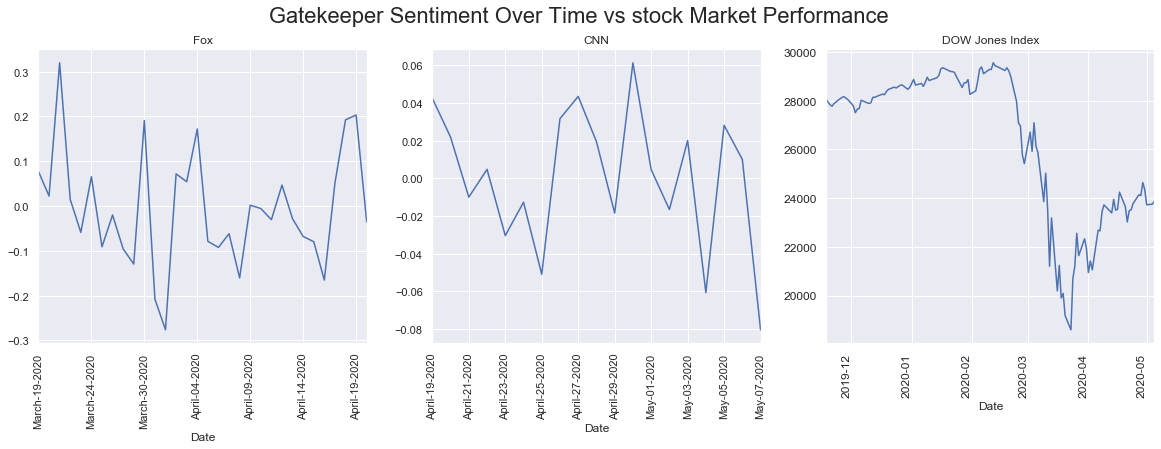

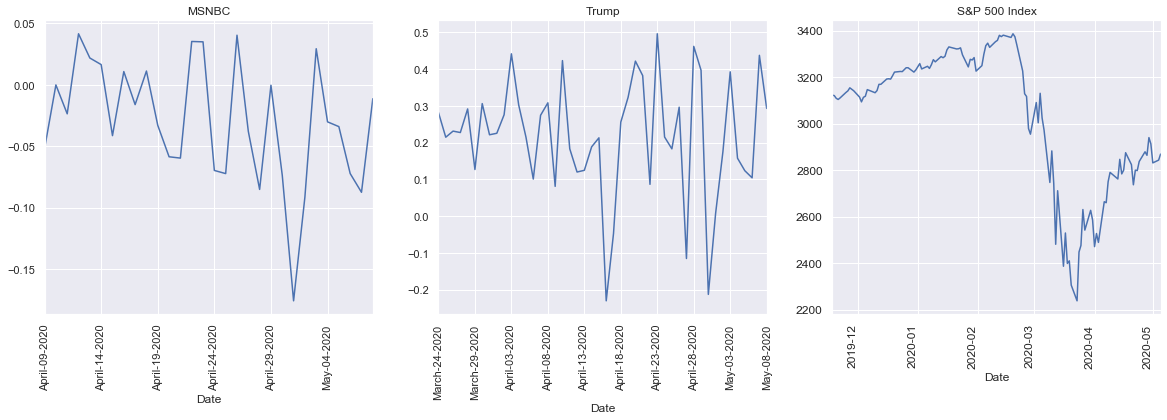

In [60]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


# Making graph header
f, (foxplot, cnnplot, dowplot) = plt.subplots(1, 3, figsize=(20, 6))
g, (msnbcplot, trumpplot, spplot) = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle('Gatekeeper Sentiment Over Time vs stock Market Performance', fontsize=22)

#Rotating for readability
def rotate_ticks(plot):
    for tick in plot.get_xticklabels():
        tick.set_rotation('vertical')
        

# Plotting the compound score vs the date
dow.Close.plot(title = 'DOW Jones Index', ax = dowplot, fontsize=12)
rotate_ticks(dowplot)
sp.Close.plot(title = 'S&P 500 Index', ax = spplot, fontsize=12)
rotate_ticks(spplot)
foxDataRev['VADER compound score'].plot(title = 'Fox', ax = foxplot)
rotate_ticks(foxplot)
cnnDataRev['VADER compound score'].plot(title = 'CNN', ax = cnnplot)
rotate_ticks(cnnplot)
msnbcDataRev['VADER compound score'].plot(title = 'MSNBC', ax = msnbcplot)
rotate_ticks(msnbcplot)
trumpDataRev['VADER compound score'].plot(title = 'Trump', ax = trumpplot)
rotate_ticks(trumpplot)

###  Saving the new VADER data into CSV

In [27]:
# Cretaing csvs from dataframes
foxData2.to_csv('ProjectData/foxData2.csv')
cnnData2.to_csv('ProjectData/cnnData2.csv')
msnbcData2.to_csv('ProjectData/msnbcData2.csv')
trumpData2.to_csv('ProjectData/trumpData2.csv')

### Summary of Data Analysis Step 5
The analysis step was fairly successful. We were able to conclude that Donald Trump by far had the most positive sentiment in Tweets over the last few months whereas FoxNews had the most negative. CNN and MSNBC were mostly neutral because their compound score was around 0 on a scale from -1 to 1. 

The next steps in the analysis is to visualize the sentiment of each Twitter user through the Pandemic weeks (End of February through Now) by grouping the tweet sentiments by day.

# Qualititative Section Step 6

# Step 6 Conclusions and Final Report

## Conclusion ##

While the sentiment of tweets varies widely, we can see some important correlation between certain tweets and stock market performance. Most notably, the Dow Jones and S&P 500's fall started to stabilize and rebound around March 20th, when Donald Trump's tweets were particularly positive. On March 19th, he said "THANK YOU!" twice, and "We are going to WIN, sooner rather than later!" as well as "America’s Private Sector is stepping up to help us be STRONG!" However, the indexes took a smaller dip at the end of March, when Fox News wrote an article (which Trump tweeted) about how he said the Coronavirus wouldn't peak until around Easter, and social distancing guidelines would be extended until at least the end of April. Fox also tweeted articles about how travel restrictions had reached unprecidented levels and lab supplies from China were drying up on the same day. Most recently, the stock market took another small around May 3rd, when CNN tweeted an article about how pandemics are going to become more frequent and more deadly in the future. That same day, MSNBC tweeted a news clip criticizing Trump's handling of the pandemic with the words "To be robbed of a human being who can feel our grief is as disorienting as the lack of explanations around testing", which recieved a lot of attention (about 10 times as many likes and retweets as their average tweets).

There are some fluctuations in the stock market which don't have as strong correlations to gatekeepers' sentiment, or which are the result of tweets on topics other than COVID-19. However, it's evident that the sentiment in tweets does have an effect on the economy. The COVID-19 pandemic has been an uncertain time for everyone, but this study makes it clear that positive language does indeed have a positive impact on the stock market, and negative language has the opposite effect.

# Credit Listing

Nikhil Pereira: Formatted the entire notebook to include Phase 1 Content and QQQ Format, Updated API Calls for better data and visualized the Trump Data Recent 20 Posts, Created Time formatting function and applied to Data Frames, Created the Sentiment Bar Plot, Annotated every section to include descriptions and summaries.Created and Presented for Final Presentation.

Julia Hoffman: Created Web Scraping Functions "getTitle" and "titleCleaner", Applied Web Scraping to Data Frames using BeautifulSoup module, Updated Financial API Call using Pandas Data Reader, Updated Financial Plots with Seaborn, Created Box Plot, Wrote a few descriptions. Plotted the Sentiment of Gatekeepers through the timeline. Created and Presented Final Presentation.

Ryan Weiss: Created the Vader Score Function and applied it to all the Twitter User Data Frames, wrote problem statement, helped adjust sentiment over time plots, wrote conclusion comparing them to changes in the stock market. Found average sentiment score per gatekeeper per day.